This notebook renders a cartoon-style image of the protein [glutathione s-transferase](https://www.rcsb.org/structure/1AQW).

In [1]:
import tempfile
from collections import defaultdict, namedtuple
from itertools import repeat
import numpy as np

import vispy
from vispy import app
app.use_app('pyglet')

import gtar

import plato
import plato.draw.vispy as draw
import IPython

In [2]:
!python pdb_downloader.py -h

usage: pdb_downloader.py [-h] [--disable-cache DISABLE_CACHE]
                         [--color-mode COLOR_MODE] [--take-assembly]
                         [--hetatm-keys HETATM_KEYS]
                         name

Download a structure from the PDB and convert it to a file for visualization

positional arguments:
  name                  Structure name (i.e. 4hhb)

optional arguments:
  -h, --help            show this help message and exit
  --disable-cache DISABLE_CACHE
                        Don't use cached files
  --color-mode COLOR_MODE
                        Way to color particles
  --take-assembly       Take the self-assembly (large) structure
  --hetatm-keys HETATM_KEYS
                        Take heteroatoms with particular given 3-letter keys


In [3]:
!python pdb_downloader.py 1aqw --take-assembly --color-mode unit --hetatm-keys GSH

Found 3464 particles
Found types: ['C', 'H', 'N', 'O', 'S']


In [4]:
with gtar.GTAR('1aqw.zip', 'r') as traj:
    positions = traj.readPath('position.f32.ind')
    diameter = traj.readPath('diameter.f32.ind')
    colors = traj.readPath('color.f32.ind').reshape((-1, 4))
    types = traj.readPath('type.u32.ind')
    box = traj.readPath('box.f32.uni')

In [5]:
prim = draw.Spheres(positions=positions, diameters=diameter, colors=colors, light_levels=3.5)
features = dict(fxaa=True, outlines=7e-3, ambient_light=.25, directional_light=(-.2, -.5, -1))
rotation = [ 0.7195881 ,  0.66670936, -0.1481717 , -0.12545502]
scene = draw.Scene(prim, features=features, size=(80, 60), pixel_scale=20, rotation=rotation)
scene.enable('ssao')
scene.show()

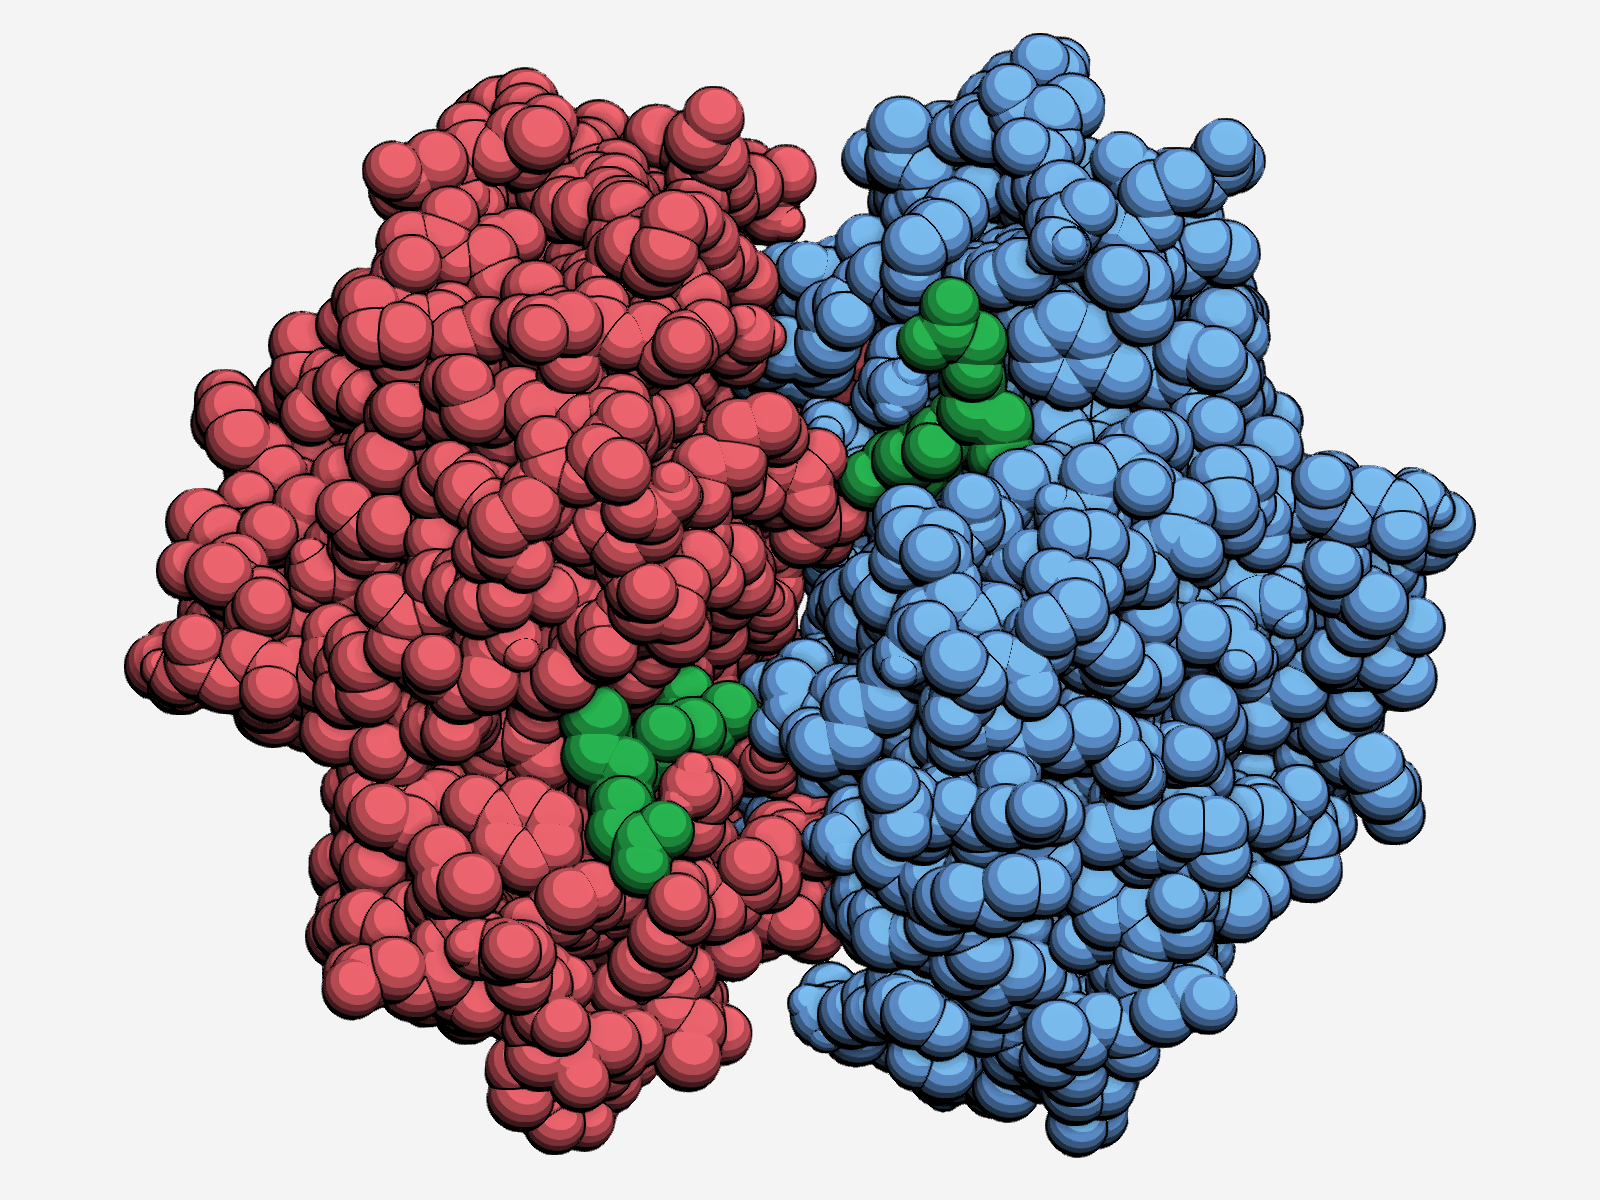

In [6]:
vispy.app.process_events()
target = '../gallery/protein_vispy.png'
scene.save(target)
IPython.display.Image(filename=target)